# Loading packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler,LabelEncoder

# Reading the Dataset

In [ ]:
df = pd.read_csv("/content/diamonds.csv")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
cols = list(df.columns)
cols.pop(cols.index('price'))
df = df[cols+['price']]
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2757
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2757
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2757
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2757


In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [ ]:
df.tail()

,carat,cut,color,clarity,depth,table,x,y,z,price
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2757
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2757
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2757
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2757
53939,0.75,Ideal,D,SI2,62.2,55.0,5.83,5.87,3.64,2757


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
df.describe()

,carat,depth,table,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


# Exploratory Data Analysis

In [ ]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

The are no null values so, we can carry on with data visualization.

In [ ]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [ ]:
df.corr()

<ipython-input-10-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,carat,depth,table,x,y,z,price
carat,1.000000,0.028224,0.181618,0.975094,0.951722,0.953387,0.921591
depth,0.028224,1.000000,-0.295779,-0.025289,-0.029341,0.094924,-0.010647
table,0.181618,-0.295779,1.000000,0.195344,0.183760,0.150929,0.127134
x,0.975094,-0.025289,0.195344,1.000000,0.974701,0.970772,0.884435
y,0.951722,-0.029341,0.183760,0.974701,1.000000,0.952006,0.865421
z,0.953387,0.094924,0.150929,0.970772,0.952006,1.000000,0.861249
price,0.921591,-0.010647,0.127134,0.884435,0.865421,0.861249,1.000000


Here we can observe that carat, x, y and z are positively correlated with price.

In [ ]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

Barplot for categorical columns.

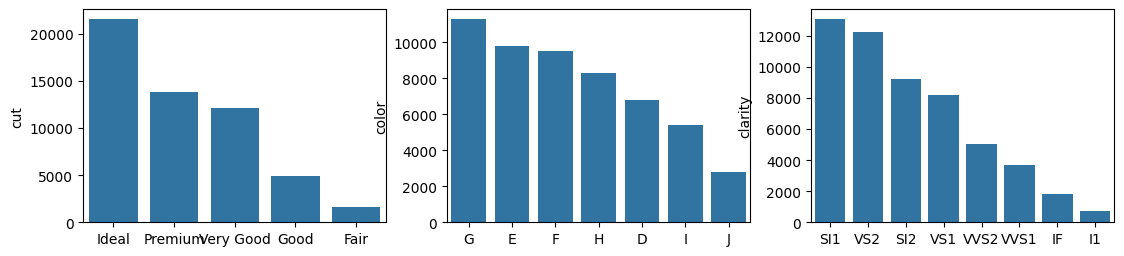

In [ ]:
obj=(df.dtypes=='object')
object_cols=list(obj[obj].index)
plt.figure(figsize=(18,36))
index=1
for col in object_cols:
  y=df[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=0)
  sns.barplot(x=list(y.index),y=y)
  index+=1

Finding correlation for numerical columns through heatmap.

<ipython-input-13-eaaf1c5d91e5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)


<Axes: >

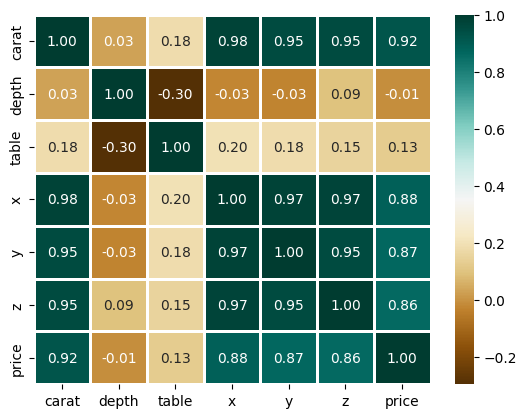

In [ ]:
sns.heatmap(df.corr(),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)

Here we can observe that carat(0.92), x(0.88), y(0.87) and z(0.86) are positively correlated with price.

Boxplot for numerical columns to check outliers.

<Axes: ylabel='z'>

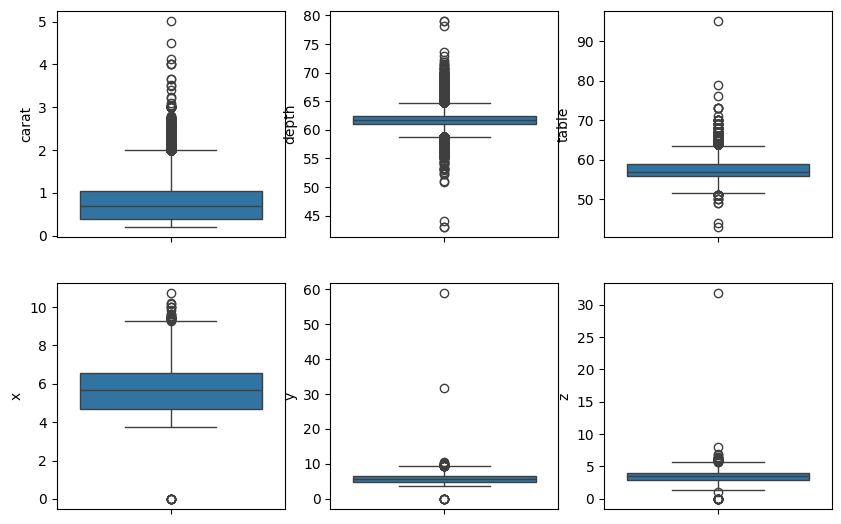

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.boxplot(df["carat"])
plt.subplot(3,3,2)
sns.boxplot(df["depth"])
plt.subplot(3,3,3)
sns.boxplot(df["table"])
plt.subplot(3,3,4)
sns.boxplot(df["x"])
plt.subplot(3,3,5)
sns.boxplot(df["y"])
plt.subplot(3,3,6)
sns.boxplot(df["z"])

There are outliers lying in carat, depth, table, x, y and z.

In [ ]:
x = df.iloc[:,0:9].values
y = df.iloc[:,9:10].values

Encoding categorical columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
x[:,1] = le.fit_transform(x[:,1])
x[:,2] = le.fit_transform(x[:,2])
x[:,3] = le.fit_transform(x[:,3])

# Splitting data and applying to machine learning algorithms Before handling outliers

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state = 0)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((43152, 9), (10788, 9), (43152, 1), (10788, 1))

# Importing Linear Regression model

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)

from sklearn.metrics import r2_score
r2_score(ytest,ypred) * 100

88.70759447815816

The accuracy for Linear Regression Model before handling outliers is 88.7075944

In [ ]:
lr.score(xtrain,ytrain)*100

88.45598201134783

The accuracy for Linear Regression Model for training data before handling outliers is 88.455 which is closer to our test data accuracy.

# Finding IQR

In [ ]:
per25 = df["carat"].quantile(0.25)
per75 = df["carat"].quantile(0.75)

In [ ]:
iqr = per75 - per25

In [ ]:
upper_limit = per75 + 1.5 * iqr
lower_limit = per25 - 1.5 * iqr

The carat rows which are less than the upper limit of carat.

In [ ]:
df[df["carat"] > upper_limit]

,carat,cut,color,clarity,depth,table,x,y,z,price
12246,2.06,Premium,J,I1,61.2,58.0,8.10,8.07,4.95,5203
13002,2.14,Fair,J,I1,69.4,57.0,7.74,7.70,5.36,5405
13118,2.15,Fair,J,I1,65.5,57.0,8.01,7.95,5.23,5430
13757,2.22,Fair,J,I1,66.7,56.0,8.04,8.02,5.36,5607
13991,2.01,Fair,I,I1,67.4,58.0,7.71,7.64,5.17,5696
...,...,...,...,...,...,...,...,...,...,...
27741,2.15,Ideal,G,SI2,62.6,54.0,8.29,8.35,5.21,18791
27742,2.04,Premium,H,SI1,58.1,60.0,8.37,8.28,4.84,18795
27744,2.29,Premium,I,SI1,61.8,59.0,8.52,8.45,5.24,18797
27746,2.07,Ideal,G,SI2,62.5,55.0,8.20,8.13,5.11,18804


In [ ]:
new_df = df[df["carat"] < upper_limit]
new_df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2757
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2757
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2757
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2757


Ploting carat with the rows which are less than the upper limit

<ipython-input-26-7600507975b3>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df["carat"])


<Axes: xlabel='carat', ylabel='Density'>

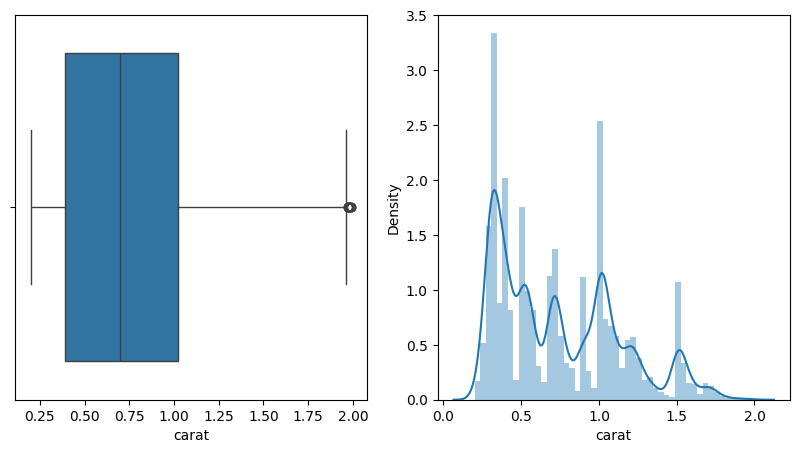

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x ="carat",data = new_df )
plt.subplot(1,2,2)
sns.distplot(new_df["carat"])

The outliers from the carat column are removed and stored in a new dataframe new_df, Just to check the boxplot.

# Handling Outliers

Copying the original dataframe so that the changes won't affect the original dataframe.

In [ ]:
new_data = df.copy()
new_data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2757
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2757
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2757
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2757


Replacing the outliers with lower quantile and upper quantile values for all numerical columns.

In [ ]:
new_data["carat"] = np.where(
    new_data["carat"] > upper_limit , upper_limit ,
    np.where(
        new_data["carat"] < lower_limit , lower_limit ,
        new_data["carat"]
    )
)

In [ ]:
per25_depth = df["depth"].quantile(0.25)
per75_depth = df["depth"].quantile(0.75)
iqr = per75_depth - per25_depth
upper_limit_depth = per75_depth + 1.5 * iqr
lower_limit_depth = per25_depth - 1.5 * iqr

In [ ]:
new_data["depth"] = np.where(
    new_data["depth"] > upper_limit_depth , upper_limit_depth ,
    np.where(
        new_data["depth"] < lower_limit_depth , lower_limit_depth ,
        new_data["depth"]
    )
)

In [ ]:
per25_table = df["table"].quantile(0.25)
per75_table = df["table"].quantile(0.75)
iqr = per75_table - per25_table
upper_limit_table = per75_table + 1.5 * iqr
lower_limit_table = per25_table - 1.5 * iqr

In [ ]:
new_data["table"] = np.where(
    new_data["table"] > upper_limit_table , upper_limit_table ,
    np.where(
        new_data["table"] < lower_limit_table , lower_limit_table ,
        new_data["table"]
    )
)

In [ ]:
per25_x = df["x"].quantile(0.25)
per75_x = df["x"].quantile(0.75)
iqr = per75_x - per25_x
upper_limit_x = per75_x + 1.5 * iqr
lower_limit_x = per25_x - 1.5 * iqr

In [ ]:
new_data["x"] = np.where(
    new_data["x"] > upper_limit_x , upper_limit_x ,
    np.where(
        new_data["x"] < lower_limit_x , lower_limit_x ,
        new_data["x"]
    )
)

In [ ]:
per25_y = df["y"].quantile(0.25)
per75_y = df["y"].quantile(0.75)
iqr = per75_y - per25_y
upper_limit_y = per75_y + 1.5 * iqr
lower_limit_y = per25_y - 1.5 * iqr

In [ ]:
new_data["y"] = np.where(
    new_data["y"] > upper_limit_y , upper_limit_y ,
    np.where(
        new_data["y"] < lower_limit_y , lower_limit_y ,
        new_data["y"]
    )
)

In [ ]:
per25_z = df["z"].quantile(0.25)
per75_z = df["z"].quantile(0.75)
iqr = per75_z - per25_z
upper_limit_z = per75_z + 1.5 * iqr
lower_limit_z = per25_z - 1.5 * iqr

In [ ]:
new_data["z"] = np.where(
    new_data["z"] > upper_limit_z , upper_limit_z ,
    np.where(
        new_data["z"] < lower_limit_z , lower_limit_z ,
        new_data["z"]
    )
)

New data frame after handling outliers

In [ ]:
new_data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.50,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.80,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,58.75,63.5,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.40,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.30,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.80,57.0,5.75,5.76,3.50,2757
53936,0.72,Good,D,SI1,63.10,55.0,5.69,5.75,3.61,2757
53937,0.70,Very Good,D,SI1,62.80,60.0,5.66,5.68,3.56,2757
53938,0.86,Premium,H,SI2,61.00,58.0,6.15,6.12,3.74,2757


<Axes: ylabel='z'>

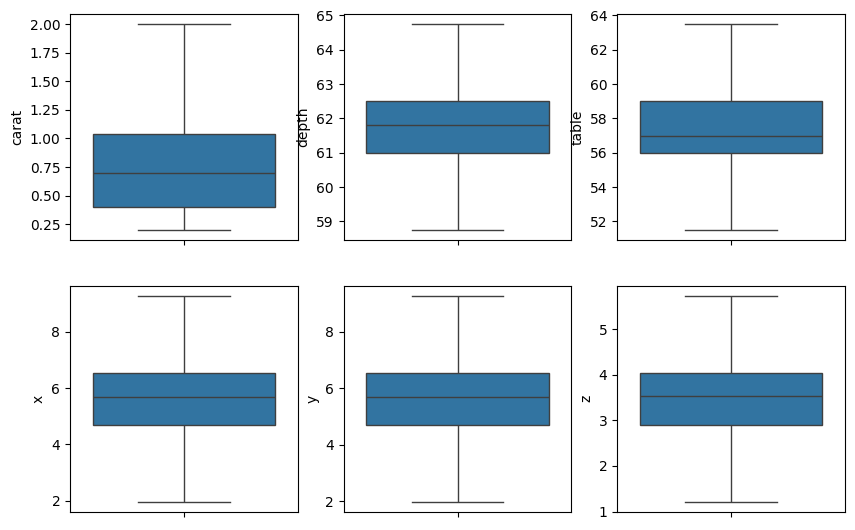

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.boxplot(new_data["carat"])
plt.subplot(3,3,2)
sns.boxplot(new_data["depth"])
plt.subplot(3,3,3)
sns.boxplot(new_data["table"])
plt.subplot(3,3,4)
sns.boxplot(new_data["x"])
plt.subplot(3,3,5)
sns.boxplot(new_data["y"])
plt.subplot(3,3,6)
sns.boxplot(new_data["z"])

After changing outliers with the IQR values the outliers have been removed.

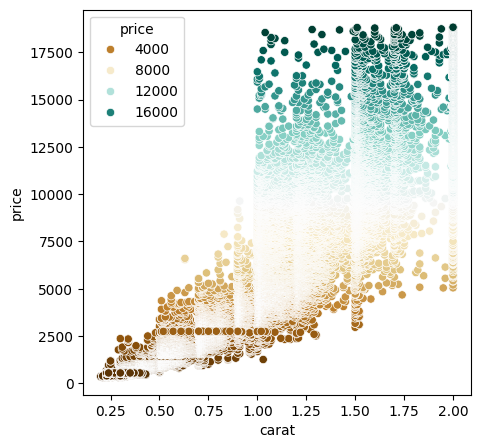

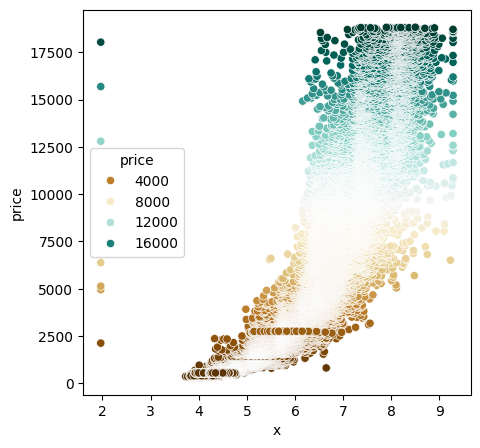

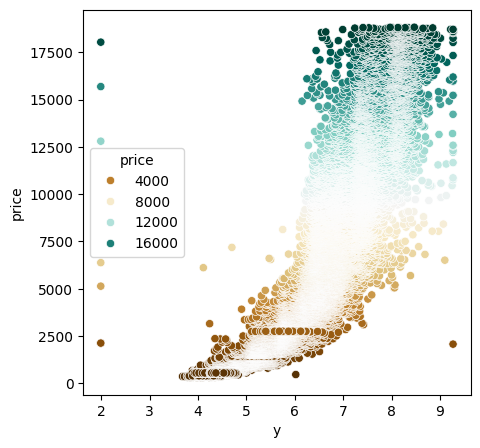

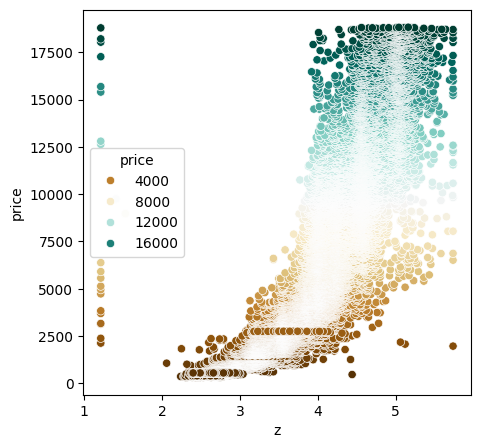

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x = new_data["carat"],y = new_data["price"],hue = new_data["price"],palette="BrBG")
plt.show()

plt.figure(figsize=(5,5))
sns.scatterplot(x = new_data["x"],y = new_data["price"],hue = new_data["price"],palette="BrBG")
plt.show()

plt.figure(figsize=(5,5))
sns.scatterplot(x = new_data["y"],y = new_data["price"],hue = new_data["price"],palette="BrBG")
plt.show()

plt.figure(figsize=(5,5))
sns.scatterplot(x = new_data["z"],y = new_data["price"],hue = new_data["price"],palette="BrBG")
plt.show()

The scatter plot shows the correlation between carat, x, y, z with price.

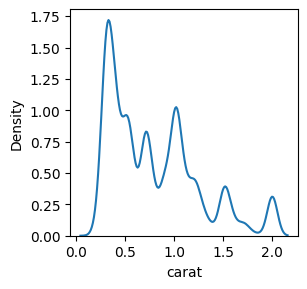

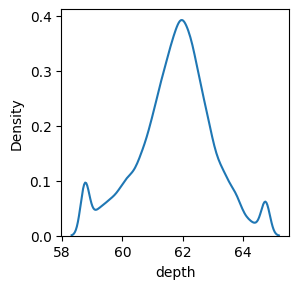

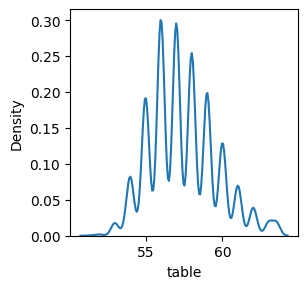

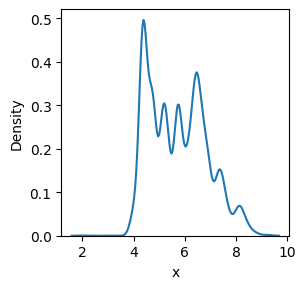

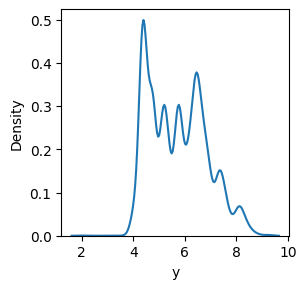

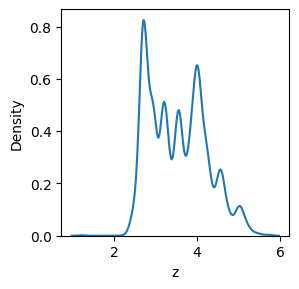

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.kdeplot(new_data["carat"])
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(3,3,2)
sns.kdeplot(new_data["depth"])
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(3,3,3)
sns.kdeplot(new_data["table"])
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(3,3,4)
sns.kdeplot(new_data["x"])
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(3,3,5)
sns.kdeplot(new_data["y"])
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(3,3,6)
sns.kdeplot(new_data["z"])
plt.show()

The kde plot for carat, depth, table, x, y and z are not normal.

<Axes: xlabel='carat', ylabel='Density'>

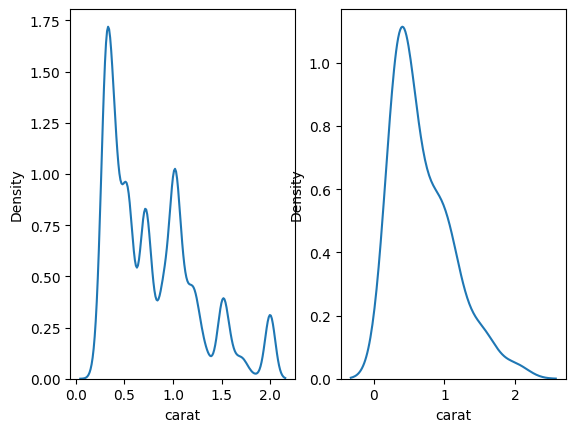

In [ ]:
carat_sample = new_data["carat"].sample(50)
plt.subplot(1,2,1)
sns.kdeplot(new_data["carat"])
plt.subplot(1,2,2)
sns.kdeplot(carat_sample)

The sample kdeplot for carat is approximately normal.

<Axes: xlabel='depth', ylabel='Density'>

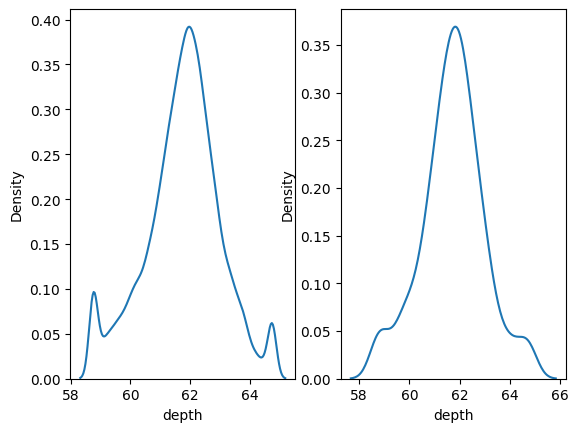

In [ ]:
depth_sample = new_data["depth"].sample(500)
plt.subplot(1,2,1)
sns.kdeplot(new_data["depth"])
plt.subplot(1,2,2)
sns.kdeplot(depth_sample)

The sample kdeplot for depth is approximately normal.

<Axes: xlabel='table', ylabel='Density'>

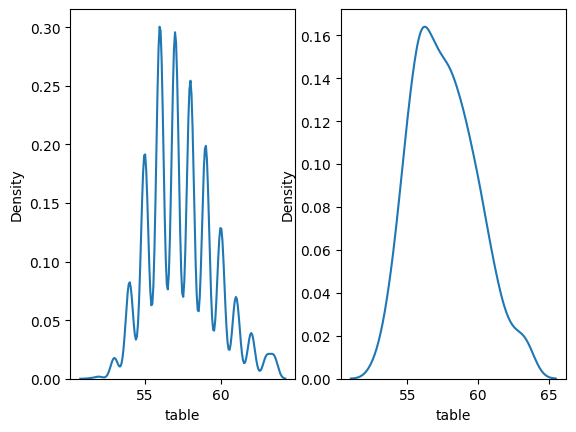

In [ ]:
table_sample = new_data["table"].sample(500)
plt.subplot(1,2,1)
sns.kdeplot(new_data["table"])
plt.subplot(1,2,2)
sns.kdeplot(table_sample)

The sample kdeplot for table is approximately normal.

<Axes: xlabel='x', ylabel='Density'>

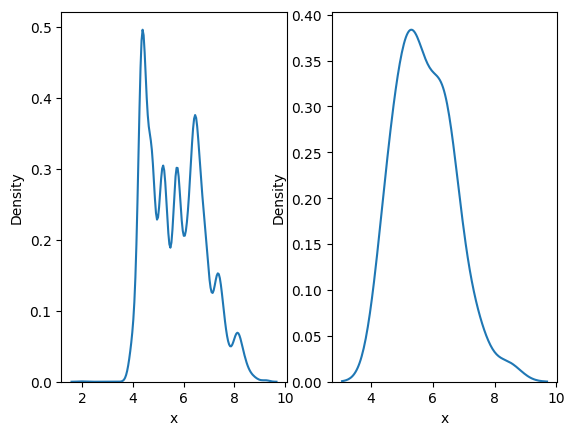

In [ ]:
x_sample = new_data["x"].sample(50)
plt.subplot(1,2,1)
sns.kdeplot(new_data["x"])
plt.subplot(1,2,2)
sns.kdeplot(x_sample)

The sample kdeplot for x is approximately normal.

<Axes: xlabel='y', ylabel='Density'>

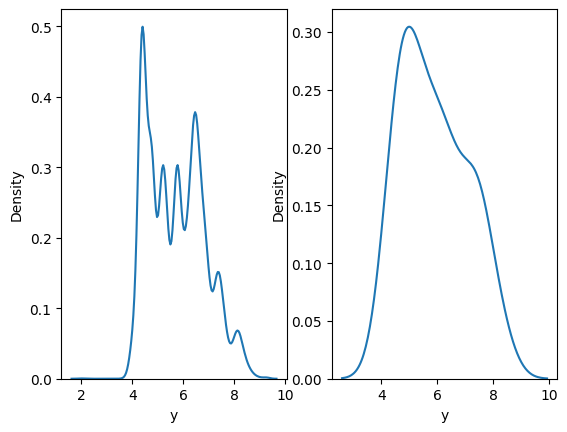

In [ ]:
y_sample = new_data["y"].sample(50)
plt.subplot(1,2,1)
sns.kdeplot(new_data["y"])
plt.subplot(1,2,2)
sns.kdeplot(y_sample)

The sample kdeplot for y is approximately normal.

<Axes: xlabel='z', ylabel='Density'>

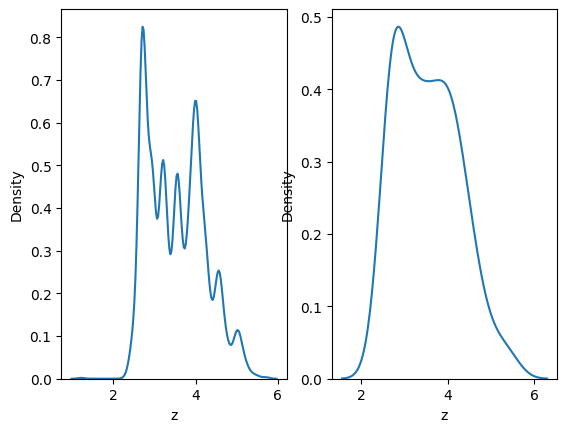

In [ ]:
z_sample = new_data["z"].sample(100)
plt.subplot(1,2,1)
sns.kdeplot(new_data["z"])
plt.subplot(1,2,2)
sns.kdeplot(z_sample)

The sample kdeplot for z is approximately normal. We can now continue to apply machine learning algorithms to the dataframe.

In [ ]:
ab = new_data.iloc[:,0:9].values
bc = new_data.iloc[:,9:10].values

# Encoding Categorical columns after handling outliers

In [ ]:
le = LabelEncoder()
ab[:,1] = le.fit_transform(x[:,1])
ab[:,2] = le.fit_transform(x[:,2])
ab[:,3] = le.fit_transform(x[:,3])

# Spliting training and testing data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(ab,bc,test_size = 0.2,random_state = 0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((43152, 9), (10788, 9), (43152, 1), (10788, 1))

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

Accuracy for linear regression model after handling outliers

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred) * 100

89.70392347983687

In [ ]:
lr.score(x_train,y_train) * 100

89.37686799815808

The accuracy for Linear Regression Model for training data after handling outliers is closer to our test data accuracy. The accuracy is slightly increased after handling outliers.

# Using RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=10,max_depth = 15)

random_forest.fit(x_train, y_train)

y_prediction = random_forest.predict(x_test)

<ipython-input-49-da25195be5d9>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(x_train, y_train)


In [ ]:
r2_score(y_test,y_prediction) * 100

89.32562770026648

The accuracy is increased by using RandomForestClassifier.

# Standard Scaling

In [ ]:
sc = StandardScaler()
sc.fit(x_train)
x_train_scaled = sc.transform(x_train)
x_test_scaled = sc.transform(x_test)
x_train_scaled = pd.DataFrame(x_train_scaled)
x_test_scaled = pd.DataFrame(x_test_scaled)

In [ ]:
lr_scaled = LinearRegression()
lr_scaled.fit(x_train_scaled,y_train)
ypredict = lr_scaled.predict(x_test_scaled)

In [ ]:
r2_score(y_test,ypredict) * 100

89.70392347983689

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=10,max_depth = 15)

random_forest.fit(x_train_scaled, y_train)

y_predict = random_forest.predict(x_test_scaled)

<ipython-input-54-816741c0cf29>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(x_train_scaled, y_train)


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict) * 100

89.27837671070071

There is not much difference in accuracy after scaling.

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_test, y_predict)*100
print(mape)


12.869618618568746


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_predict)

print(mse)


1699557.451427512


In [ ]:
rmse = np.sqrt(mse)
print(rmse)

1303.6707603637938


In [ ]:
print("The accuracy for linear regression before hanling outliers is : ",r2_score(ytest,ypred) * 100)
print("The accuracy for linear regression after hanling outliers is : ",r2_score(y_test,y_pred) * 100)
print("The accuracy for randomforestclassifier after hanling outliers is : ",r2_score(y_test,y_prediction) * 100)
print("The accuracy for linear regression after scaling is : ",r2_score(y_test,ypredict) * 100)
print("The accuracy for randomforestclassifier after scaling is : ",r2_score(y_test,y_predict) * 100)
print("The mean absolute percentage error for randomforestclassifier after scaling is : ",mape)
print("The mean squared error for randomforestclassifier after scaling is : ",mse)
print("The root mean squared error for randomforestclassifier after scaling is : ",rmse)

The accuracy for linear regression before hanling outliers is :  88.70759447815816
The accuracy for linear regression after hanling outliers is :  89.70392347983687
The accuracy for randomforestclassifier after hanling outliers is :  89.32562770026648
The accuracy for linear regression after scaling is :  89.70392347983689
The accuracy for randomforestclassifier after scaling is :  89.27837671070071
The mean absolute percentage error for randomforestclassifier after scaling is :  12.869618618568746
The mean squared error for randomforestclassifier after scaling is :  1699557.451427512
The root mean squared error for randomforestclassifier after scaling is :  1303.6707603637938


In [ ]:
q = r2_score(ytest,ypred) * 100
w = r2_score(y_test,y_pred) * 100
e = r2_score(y_test,y_prediction) * 100
r = r2_score(y_test,ypredict) * 100
t = r2_score(y_test,y_predict) * 100
u = mape
i = mse
o = rmse

In [ ]:
Accuracy_df = [round(q), round(w), round(e), round(r), round(t), round(u), round(i), round(o)]
Accuracy_df = pd.DataFrame(Accuracy_df)

In [ ]:
Accuracy_df = Accuracy_df.T
Accuracy_df.columns = ["Linear Regression (Before Outliers)", "Linear Regression (After Outliers)", "RandomForestClassifier (After Outliers)", "Linear Regression (After Scaling)", "RandomForestClassifier (After Scaling)", "Mean Absolute Percentage Error", "Mean Squared Error", "Root Mean Squared Error"]
Accuracy_df

,Linear Regression (Before Outliers),Linear Regression (After Outliers),RandomForestClassifier (After Outliers),Linear Regression (After Scaling),RandomForestClassifier (After Scaling),Mean Absolute Percentage Error,Mean Squared Error,Root Mean Squared Error
0,89,90,89,90,89,13,1699557,1304
